#**Actividad Semana 1**
Por: Laura Sofía Leyva Aldana

In [ ]:
# Importar Librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Crear un dataset
name = ['Camilo', 'Marcos', 'Juan','Andrea','Esteban','Maria', 'Susana', 'Andres','Diana','Daniel']
last_name = ['Fernandez', 'Ardila', 'Roncancio','Hernandez','Rodriguez','Almanza', 'Chavarro', 'Garcia','Salguero','Vallejo']
date = ['01-04-2024','12-04-2024','20-04-2024','04-04-2024','15-04-2024','07-04-2024','14-04-2024','20-04-2024','23-04-2024','12-04-2024']
deadline = ['10-04-2024','10-04-2024','10-04-2024','05-04-2024','10-04-2024','01-04-2024','10-04-2024','20-04-2024','20-04-2024','10-04-2024']
plan_value= [1300,4500,7800,4200,5300,4800,6800,5400,7000,6000] # Plan Value - miles de pesos

data_dict = {"Name":name,
             "Last name":last_name,
             "Deadline":deadline,
             "Payment Day":date,
             "Value":plan_value}

# Convierte un dictionario en un dataframe
print("\nDataFrame Pago y Valor Plan celular :")
df = pd.DataFrame(data_dict)
df['Payment Day'] = pd.to_datetime(df['Payment Day'], dayfirst=True) #Pandas Datetime
df['Deadline'] = pd.to_datetime(df['Deadline'], dayfirst=True) #Pandas Datetime
df


DataFrame Pago y Valor Plan celular :


,Name,Last name,Deadline,Payment Day,Value
0,Camilo,Fernandez,2024-04-10,2024-04-01,1300
1,Marcos,Ardila,2024-04-10,2024-04-12,4500
2,Juan,Roncancio,2024-04-10,2024-04-20,7800
3,Andrea,Hernandez,2024-04-05,2024-04-04,4200
4,Esteban,Rodriguez,2024-04-10,2024-04-15,5300
5,Maria,Almanza,2024-04-01,2024-04-07,4800
6,Susana,Chavarro,2024-04-10,2024-04-14,6800
7,Andres,Garcia,2024-04-20,2024-04-20,5400
8,Diana,Salguero,2024-04-20,2024-04-23,7000
9,Daniel,Vallejo,2024-04-10,2024-04-12,6000


In [ ]:
# Función para identificar si realizo el pago a tiempo
# Plan payment - Codificación ( 0-> No, 1-> Si) - Variable Categorica
def condition(row):
    if row['Payment Day']> row['Deadline']:
        return 0
    else:
        return 1
df['Payment'] = df.apply(condition, axis=1)

print("\n DataFrame Códificación Pago:")
df


 DataFrame Códificación Pago:


,Name,Last name,Deadline,Payment Day,Value,Payment,Surcharge
0,Camilo,Fernandez,2024-04-10,2024-04-01,1300,1,1300.0
1,Marcos,Ardila,2024-04-10,2024-04-12,4500,0,4860.0
2,Juan,Roncancio,2024-04-10,2024-04-20,7800,0,8424.0
3,Andrea,Hernandez,2024-04-05,2024-04-04,4200,1,4200.0
4,Esteban,Rodriguez,2024-04-10,2024-04-15,5300,0,5724.0
5,Maria,Almanza,2024-04-01,2024-04-07,4800,0,5184.0
6,Susana,Chavarro,2024-04-10,2024-04-14,6800,0,7344.0
7,Andres,Garcia,2024-04-20,2024-04-20,5400,1,5400.0
8,Diana,Salguero,2024-04-20,2024-04-23,7000,0,7560.0
9,Daniel,Vallejo,2024-04-10,2024-04-12,6000,0,6480.0


In [ ]:
# Función para indicar el recargo si no realizo el pago en la fecha estipulada
def condition(row):
    if row['Payment'] == 1 :
        return row['Value']
    else:
        return row['Value']* 1.08
df['Surcharge'] = df.apply(condition, axis=1)

print("\n DataFrame Pago y Valor Plan celular con Recargo:")
df


 DataFrame Pago y Valor Plan celular con Recargo:


,Name,Last name,Deadline,Payment Day,Value,Payment,Surcharge
0,Camilo,Fernandez,2024-04-10,2024-04-01,1300,1,1300.0
1,Marcos,Ardila,2024-04-10,2024-04-12,4500,0,4860.0
2,Juan,Roncancio,2024-04-10,2024-04-20,7800,0,8424.0
3,Andrea,Hernandez,2024-04-05,2024-04-04,4200,1,4200.0
4,Esteban,Rodriguez,2024-04-10,2024-04-15,5300,0,5724.0
5,Maria,Almanza,2024-04-01,2024-04-07,4800,0,5184.0
6,Susana,Chavarro,2024-04-10,2024-04-14,6800,0,7344.0
7,Andres,Garcia,2024-04-20,2024-04-20,5400,1,5400.0
8,Diana,Salguero,2024-04-20,2024-04-23,7000,0,7560.0
9,Daniel,Vallejo,2024-04-10,2024-04-12,6000,0,6480.0



 Gráfico Valor Pago sin Recargo Vs Valor Pago con Recargo :


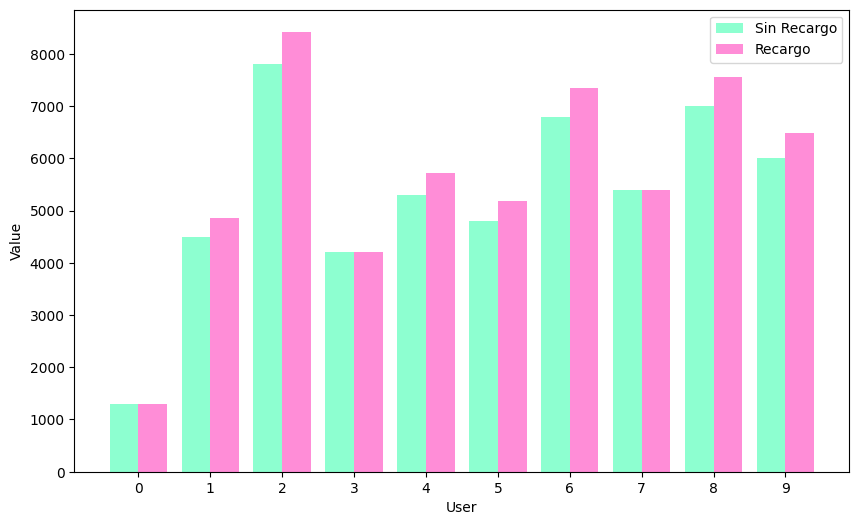

In [ ]:
print("\n Gráfico Valor Pago sin Recargo Vs Valor Pago con Recargo :")
# Configurar el gráfico
plt.figure(figsize=(10, 6))

# Graficar los valores sin recargo
plt.bar(df.index - 0.2, df['Value'], width=0.4, label='Sin Recargo', align='center', color='#8DFFD0')

# Graficar los valores con recargo
plt.bar(df.index + 0.2, df['Surcharge'], width=0.4, label='Recargo', align='center', color='#FF8DD7')

# Etiquetas y título
plt.xlabel('User')
plt.ylabel('Value')
plt.xticks(df.index, labels=df.index)
plt.legend()

# Mostrar el gráfico
plt.show()